<a href="https://colab.research.google.com/github/ANISDBH/libsense/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [ ]:
# import data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print (' X : ', x_train)
print (' Y : ', y_train)
print (' X_Test : ', x_test)
print (' Y_Test : ', y_test)

In [ ]:
print (x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


The image label is  [8]


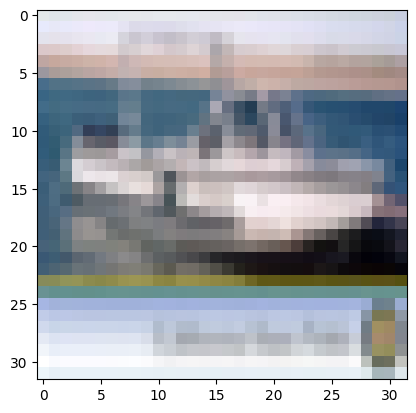

In [ ]:
index = 155
img = plt.imshow(x_train[index])
print ("The image label is ", y_train[index])

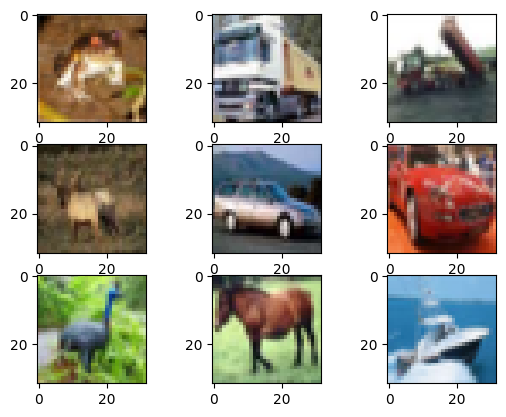

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])
plt.show()

In [ ]:
#Image labels encoding
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('the image class is:', classification[y_train[index][0]])

the image class is: ship


In [ ]:
y_train_c = tf.keras.utils.to_categorical(y_train)
y_test_c = tf.keras.utils.to_categorical(y_test)
print (y_train_c.shape)
print (y_test_c.shape)
y_train_c[index]

(50000, 10)
(10000, 10)


array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
x_train = x_train/255
x_test = x_test/255
print (x_train)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [ ]:
def createmodel () :

  model = Sequential()
  model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())

  model.add(Dense(1000,activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(250,activation='relu'))
  model.add(Dense(10,activation='relu'))

  return model

model = createmodel()

In [ ]:
def createmodel_VGG () :
  model_VGG = Sequential()

  model_VGG.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model_VGG.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model_VGG.add(MaxPooling2D((2, 2)))

  model_VGG.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model_VGG.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model_VGG.add(MaxPooling2D((2, 2)))

  model_VGG.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model_VGG.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model_VGG.add(MaxPooling2D((2, 2)))

  model_VGG.add(Flatten())

  model_VGG.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model_VGG.add(Dense(10, activation='softmax'))

  return model_VGG

model_VGG = createmodel_VGG ()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_VGG.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
Training = model.fit(x_train,y_train_c,validation_data=(x_test,y_test_c),epochs=10,batch_size=250,validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 83s 406ms/step - loss: 2.2860 - accuracy: 0.1583 - val_loss: 2.0843 - val_accuracy: 0.2059
Epoch 2/10
200/200 [==============================] - 81s 403ms/step - loss: 2.1277 - accuracy: 0.2121 - val_loss: 2.0805 - val_accuracy: 0.2034
Epoch 3/10
200/200 [==============================] - 80s 400ms/step - loss: 2.1219 - accuracy: 0.2056 - val_loss: 1.9485 - val_accuracy: 0.2435
Epoch 4/10
200/200 [==============================] - 81s 405ms/step - loss: 1.9691 - accuracy: 0.2700 - val_loss: 1.8433 - val_accuracy: 0.3302
Epoch 5/10
200/200 [==============================] - 77s 384ms/step - loss: 1.8945 - accuracy: 0.2995 - val_loss: 1.9264 - val_accuracy: 0.3371
Epoch 6/10
200/200 [==============================] - 77s 383ms/step - loss: 1.9034 - accuracy: 0.3176 - val_loss: 2.3173 - val_accuracy: 0.1065
Epoch 7/10
200/200 [==============================] - 75s 375ms/step - loss: 1.9074 - accuracy: 0.3101 - val_loss: 1.6972 - val_ac

In [ ]:
Training_VGG = model_VGG.fit(x_train,y_train_c,validation_data=(x_test,y_test_c),epochs=10,batch_size=250,validation_split=0.2)

Epoch 1/10
200/200 [==============================] - 366s 2s/step - loss: 1.6232 - accuracy: 0.4075 - val_loss: 1.2898 - val_accuracy: 0.5287
Epoch 2/10
200/200 [==============================] - 383s 2s/step - loss: 1.1292 - accuracy: 0.5992 - val_loss: 1.0096 - val_accuracy: 0.6449
Epoch 3/10
200/200 [==============================] - 359s 2s/step - loss: 0.9039 - accuracy: 0.6854 - val_loss: 0.9249 - val_accuracy: 0.6781
Epoch 4/10
200/200 [==============================] - 365s 2s/step - loss: 0.7464 - accuracy: 0.7413 - val_loss: 0.8267 - val_accuracy: 0.7180
Epoch 5/10
200/200 [==============================] - 359s 2s/step - loss: 0.6353 - accuracy: 0.7792 - val_loss: 0.7747 - val_accuracy: 0.7385
Epoch 6/10
200/200 [==============================] - 363s 2s/step - loss: 0.5320 - accuracy: 0.8156 - val_loss: 0.7959 - val_accuracy: 0.7310
Epoch 7/10
200/200 [==============================] - 363s 2s/step - loss: 0.4390 - accuracy: 0.8462 - val_loss: 0.7850 - val_accuracy: 0.7451

In [ ]:
model.evaluate(x_test,y_test_c)[1]
model_VGG.evaluate(x_test,y_test_c)[1]

313/313 [==============================] - 20s 62ms/step - loss: 0.9784 - accuracy: 0.7433


0.7433000206947327

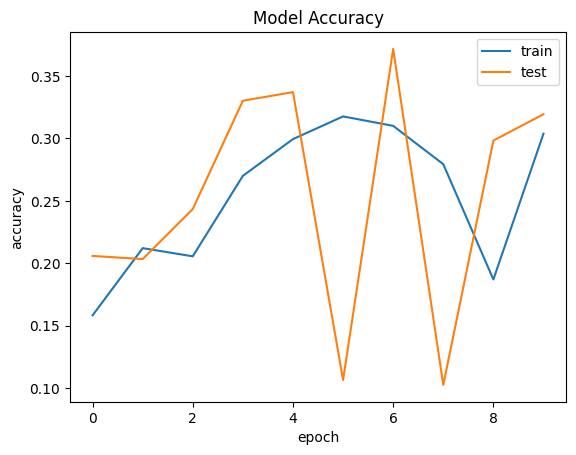

In [ ]:
plt.plot(Training.history['accuracy'])
plt.plot(Training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

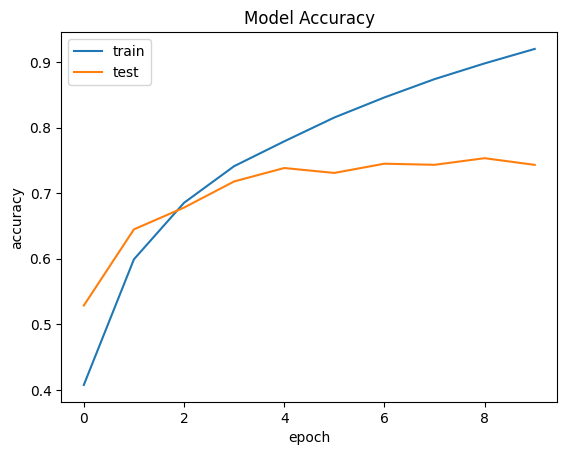

In [ ]:
plt.plot(Training_VGG.history['accuracy'])
plt.plot(Training_VGG.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
#Test with new data
from google.colab import files
uploaded = files.upload()

Saving car.jpg to car.jpg


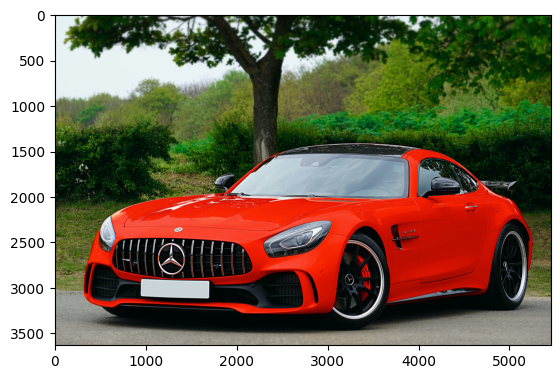

In [ ]:
img = plt.imread('car.jpg')
img = plt.imshow(img)
import cv2

Mounted at /content/gdrive


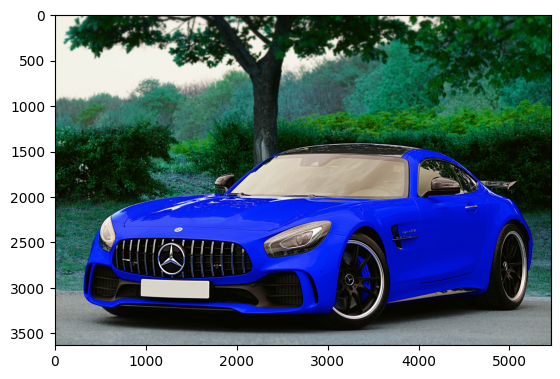

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import cv2
img = cv2.imread('/content/gdrive/MyDrive/car.jpg')
img = plt.imshow(img)

Resized Dimensions :  (32, 32, 3)


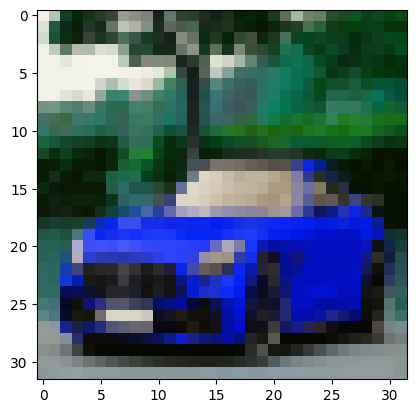

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/car.jpg')
if img is not None:
    # Redimensionner l'image
    resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
    print('Resized Dimensions : ', resized.shape)

    # Afficher l'image redimensionnée
    plt.imshow(resized)
else:
    print("Error")

In [ ]:
predic1 = model.predict(np.array([resized]))
predic1

1/1 [==============================] - 0s 139ms/step


array([[ 75502.664 , 183137.4   ,   7743.6167,  16518.27  ,   6869.477 ,
             0.    ,      0.    ,      0.    , 121586.625 , 122829.734 ]],
      dtype=float32)

In [ ]:
predic2 = model_VGG.predict(np.array([resized]))
predic2

1/1 [==============================] - 0s 200ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

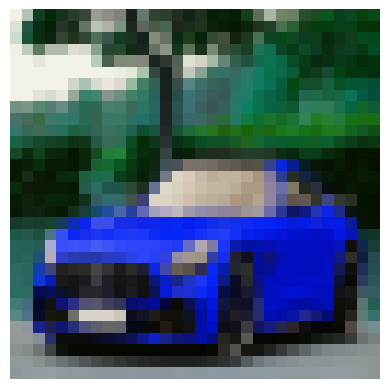

1/1 [==============================] - 0s 38ms/step
Prediction using the model: 1
Prediction using the VGG model: 1


In [ ]:
resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
resized = np.expand_dims(resized, axis=0)
resized = resized / 255.0  # Normalize the image data

# Show the resized image
plt.imshow(resized[0])
plt.axis('off')
plt.show()

# Make predictions using the models
prediction_model = model.predict(resized)
prediction_model_VGG = model_VGG.predict(resized)

# Display predictions
print("Prediction using the model:", np.argmax(prediction_model))
print("Prediction using the VGG model:", np.argmax(prediction_model_VGG))


In [ ]:
#sort the predictions
list_index = [0,1,2,3,4,5,6,7,8,9]
x1 = predic1
x2 = predic2
for i in range(10):
  for j in range(10):
    if x1[0][list_index[i]] > x1[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

for i in range(10):
  for j in range(10):
    if x2[0][list_index[i]] > x2[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#print the first 3 predictions
for i in range(3):
  print('Model1, prediction', i+1, ' is :', classification[list_index[i]], ', about', round( predic1[0][list_index[i]] , 5)*100  )
print('------------------------------------------------------------')
for i in range(3):
  print('Model2, prediction', i+1, ' is :', classification[list_index[i]], ', about', round( predic2[0][list_index[i]] , 5)*100  )

Model1, prediction 1  is : automobile , about 18313740.625
Model1, prediction 2  is : truck , about 12282973.4375
Model1, prediction 3  is : ship , about 12158662.5
------------------------------------------------------------
Model2, prediction 1  is : automobile , about 100.0
Model2, prediction 2  is : truck , about 0.0
Model2, prediction 3  is : ship , about 0.0
